In [1]:
from __future__ import division
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
#from analytics_tools.analytics_tools3 import freq_discrete
%matplotlib inline

In [2]:
df = pd.read_excel('Data/churn.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2801 entries, 0 to 2800
Data columns (total 14 columns):
V_ACCT_LGHT      2801 non-null int64
C_IP             2801 non-null object
C_VMP            2801 non-null object
V_N_VM_MESS      2801 non-null int64
V_T_DAY_CHG      2801 non-null float64
V_T_EVE_CALLS    2801 non-null int64
V_T_EVE_CHG      2801 non-null float64
V_T_NIG_CALLS    2801 non-null int64
V_T_NIG_CHG      2801 non-null float64
V_T_INT_CALLS    2801 non-null int64
V_T_INT_CHG      2801 non-null float64
V_CS_CALLS       2801 non-null int64
TARGET           2801 non-null int64
ID               2801 non-null int64
dtypes: float64(4), int64(8), object(2)
memory usage: 306.4+ KB


In [4]:
df.head()

,V_ACCT_LGHT,C_IP,C_VMP,V_N_VM_MESS,V_T_DAY_CHG,V_T_EVE_CALLS,V_T_EVE_CHG,V_T_NIG_CALLS,V_T_NIG_CHG,V_T_INT_CALLS,V_T_INT_CHG,V_CS_CALLS,TARGET,ID
0,128,No,Yes,25,45.07,99,16.78,91,11.01,3,2.70,1,0,1
1,107,No,Yes,26,27.47,103,16.62,103,11.45,3,3.70,1,0,2
2,137,No,No,0,41.38,110,10.30,104,7.32,5,3.29,0,0,3
3,65,No,No,0,21.95,83,19.42,111,9.40,6,3.43,4,1,11
4,168,No,No,0,21.90,71,8.92,128,6.35,2,3.02,1,0,13


In [5]:
var_cont = [v for v in df.columns if v[:2]=='V_']

In [6]:
len(var_cont)

10

In [7]:
df_m= df.sample(frac=0.1)
df_m.reset_index(drop=True,inplace=True)

In [8]:
x = df_m[var_cont]
y = df_m[['TARGET']].copy()

In [9]:
X = df[var_cont].copy()
Y = df['TARGET'].copy()

In [10]:
from sklearn.manifold import MDS
from sklearn.preprocessing import MinMaxScaler

In [11]:
mds = MDS(n_components=2)
sc = MinMaxScaler()
xm = pd.DataFrame(mds.fit_transform(sc.fit_transform(x)),columns=['d1','d2'])

In [12]:
xm = xm.merge(y,left_index=True,right_index=True,how='inner')

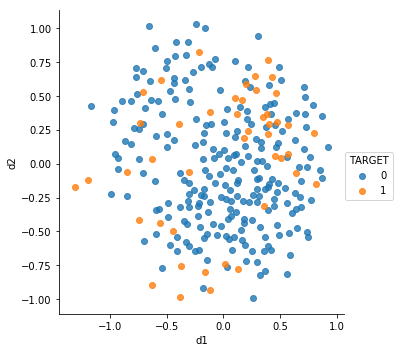

In [13]:
sns.lmplot(data=xm,x='d1',y='d2',hue='TARGET',fit_reg=False)

In [14]:
Xt,Xv,yt,yv = train_test_split(X,Y,train_size=0.7)

In [15]:
model = DecisionTreeClassifier()

In [16]:
model.fit(Xt,yt)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [17]:
def metricas(model,Xt,Xv,yt,yv):
    print "Accuracy_Train %.2f, Accuracy_Validate %.2f "%(accuracy_score(y_pred=model.predict(Xt),y_true=yt),accuracy_score(y_pred=model.predict(Xv),y_true=yv))
    print "ROC_Train %.2f, ROC_Validate %.2f "%(roc_auc_score(y_score=model.predict_proba(Xt)[:,1],y_true=yt),roc_auc_score(y_score=model.predict_proba(Xv)[:,1],y_true=yv))


In [18]:
metricas(model,Xt,Xv,yt,yv)

Accuracy_Train 1.00, Accuracy_Validate 0.86 
ROC_Train 1.00, ROC_Validate 0.73 


In [19]:
param_grid = dict({'criterion':['gini','entropy'],
              'max_features': range(1,11),
              'max_depth':range(1,20),  
              'min_samples_split' : range(5,105,5)
             })

In [20]:
grid = GridSearchCV(param_grid=param_grid,
                    n_jobs=-1,
                    estimator=model,
                    scoring='accuracy',
                    cv=3)

In [21]:
%%time
grid.fit(X,Y)

CPU times: user 45.7 s, sys: 1.63 s, total: 47.3 s
Wall time: 1min 46s


GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [22]:
grid.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
metricas(grid.best_estimator_,Xt,Xv,yt,yv)

Accuracy_Train 0.94, Accuracy_Validate 0.92 
ROC_Train 0.91, ROC_Validate 0.90 


(array([2246.,  223.,   15.,   44.,   19.,   30.,    9.,    4.,   49.,
         162.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

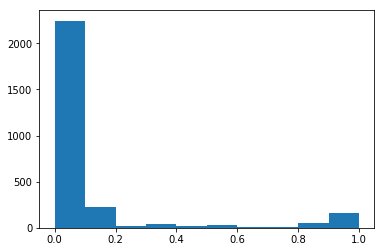

In [25]:
plt.hist(grid.best_estimator_.predict_proba(X)[:,1])